Il committente richiede di avere un report su *casi* e *vaccinazioni* in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da **Our World in Data**, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data.

Alla voce *"Download our complete COVID-19 dataset"* scaricare il dataset nel formato che si preferisce.

In [2]:
import pandas as pd, numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
covid_db = pd.read_csv(r'C:\Users\Utente\Desktop\Epicode\Python\Datasets\altri_dataset\owid-covid-data.csv')

Si richiede di verificare le *dimensioni* del dataset e i relativi *metadati*.

In [7]:
covid_db.shape
# Verifico le dimensioni (righe e colonne) del DataFrame

(429435, 67)

In [9]:
covid_col = covid_db.columns
for column in covid_col:
    print(column)
# Vsualizzo le colonne

iso_code
continent
location
date
total_cases
new_cases
new_cases_smoothed
total_deaths
new_deaths
new_deaths_smoothed
total_cases_per_million
new_cases_per_million
new_cases_smoothed_per_million
total_deaths_per_million
new_deaths_per_million
new_deaths_smoothed_per_million
reproduction_rate
icu_patients
icu_patients_per_million
hosp_patients
hosp_patients_per_million
weekly_icu_admissions
weekly_icu_admissions_per_million
weekly_hosp_admissions
weekly_hosp_admissions_per_million
total_tests
new_tests
total_tests_per_thousand
new_tests_per_thousand
new_tests_smoothed
new_tests_smoothed_per_thousand
positive_rate
tests_per_case
tests_units
total_vaccinations
people_vaccinated
people_fully_vaccinated
total_boosters
new_vaccinations
new_vaccinations_smoothed
total_vaccinations_per_hundred
people_vaccinated_per_hundred
people_fully_vaccinated_per_hundred
total_boosters_per_hundred
new_vaccinations_smoothed_per_million
new_people_vaccinated_smoothed
new_people_vaccinated_smoothed_per_hundre

In [11]:
covid_db.info()
# Panoramica generale 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [13]:
covid_db.describe().round(2)
# Panoramica generale delle colonne numeriche

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,410159.00,408929.00,411804.00,410608.00,409378.00,411804.00,410159.00,408929.00,411804.00,...,243817.00,161741.00,290689.00,390299.00,319127.00,4.294350e+05,13411.00,13411.00,13411.00,13411.00
mean,7.365292e+06,8017.36,8041.03,81259.57,71.85,72.06,112096.20,122.36,122.71,835.51,...,33.10,50.65,3.11,73.70,0.72,1.520336e+08,56047.65,9.77,10.93,1772.67
std,4.477582e+07,229664.87,86616.11,441190.14,1368.32,513.64,162240.41,1508.78,559.70,1134.93,...,13.85,31.91,2.55,7.39,0.15,6.975408e+08,156869.08,12.04,24.56,1991.89
min,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.70,1.19,0.10,53.28,0.39,4.700000e+01,-37726.10,-44.23,-95.92,-2936.45
25%,6.280750e+03,0.00,0.00,43.00,0.00,0.00,1916.10,0.00,0.00,24.57,...,22.60,20.86,1.30,69.50,0.60,5.237980e+05,176.50,2.06,-1.50,116.87
50%,6.365300e+04,0.00,12.00,799.00,0.00,0.00,29145.48,0.00,2.79,295.09,...,33.10,49.54,2.50,75.05,0.74,6.336393e+06,6815.20,8.13,5.66,1270.80
75%,7.582720e+05,0.00,313.29,9574.00,0.00,3.14,156770.19,0.00,56.25,1283.82,...,41.50,82.50,4.21,79.46,0.83,3.296952e+07,39128.04,15.16,15.58,2883.02
max,7.758668e+08,44236227.00,6319461.00,7057132.00,103719.00,14817.00,763598.60,241758.23,34536.89,6601.11,...,78.10,100.00,13.80,86.75,0.96,7.975105e+09,1349776.40,78.08,378.22,10293.52


In [15]:
covid_db.sample(10)
# Visualizzo 10 righe campione per avere un'idea più chiara del dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
95294,COD,Africa,Democratic Republic of Congo,2024-03-12,100251.0,0.0,4.714,1468.0,0.0,0.000,...,NaN,4.472,NaN,60.68,0.480,99010216,NaN,NaN,NaN,NaN
120695,OWID_EUN,NaN,European Union (27),2022-02-19,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,450146793,NaN,NaN,NaN,NaN
283538,OWID_NIR,Europe,Northern Ireland,2021-12-10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1896000,NaN,NaN,NaN,NaN
114073,EST,Europe,Estonia,2021-06-22,130679.0,0.0,40.286,1261.0,0.0,0.286,...,39.3,NaN,4.69,78.74,0.892,1326064,NaN,NaN,NaN,NaN
367516,SDN,Africa,Sudan,2024-05-05,63993.0,0.0,0.000,5046.0,0.0,0.000,...,NaN,23.437,0.80,65.31,0.510,46874200,NaN,NaN,NaN,NaN
388839,TUN,Africa,Tunisia,2021-04-03,249703.0,0.0,614.000,8705.0,0.0,25.571,...,65.8,78.687,2.30,76.70,0.740,12356116,NaN,NaN,NaN,NaN
107145,EGY,Africa,Egypt,2024-07-23,516023.0,0.0,0.000,24830.0,0.0,0.000,...,50.1,89.827,1.60,71.99,0.707,110990096,NaN,NaN,NaN,NaN
357609,OWID_SAM,NaN,South America,2020-02-19,0.0,0.0,0.000,0.0,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,436816679,NaN,NaN,NaN,NaN
380954,TLS,Asia,East Timor,2021-11-18,NaN,NaN,NaN,NaN,NaN,NaN,...,78.1,28.178,5.90,69.50,0.606,1341298,NaN,NaN,NaN,NaN
242516,MYT,Africa,Mayotte,2021-05-15,20134.0,0.0,5.714,170.0,0.0,0.000,...,NaN,NaN,NaN,79.46,NaN,326113,NaN,NaN,NaN,NaN


Si chiede di trovare, per ogni **continente**:

- il numero di casi fin dall'inizio della pandemia;

- la percentuale rispetto al totale mondiale del numero di casi.

In [18]:
covid_db['continent'].unique()
# Visualizzo quali sono effettivamente i continenti 

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [20]:
covid_db['location'].nunique()

255

In [22]:
covid_db['continent'].value_counts(dropna=False)
# Il dato NaN va tenuto in considerazione

continent
Africa           95419
Europe           91031
Asia             84199
North America    68638
Oceania          40183
NaN              26525
South America    23440
Name: count, dtype: int64

In [24]:
covid_db[covid_db['continent'].isin(['Asia'])][['continent', 'new_cases', 'date']].sample(10)
# Faccio un controllo su un continente per visualizzare meglio la distribuzione di casi e date

,continent,new_cases,date
229856,Asia,0.0,2023-05-27
374312,Asia,NaN,2020-01-24
202926,Asia,0.0,2022-07-01
193048,Asia,0.0,2022-12-14
259232,Asia,0.0,2021-04-17
337243,Asia,0.0,2022-12-12
424543,Asia,0.0,2020-05-14
347473,Asia,0.0,2024-06-19
178240,Asia,0.0,2023-09-01
380939,Asia,NaN,2021-11-03


In [26]:
covid_db.groupby('continent')['new_cases'].sum()
# Somma dei nuovi casi (dall'inizio della pandemia) per continente

continent
Africa            13146831.0
Asia             301564180.0
Europe           252916868.0
North America    124492698.0
Oceania           15003468.0
South America     68811012.0
Name: new_cases, dtype: float64

In [28]:
total_cases_asia = covid_db[covid_db['continent'] == 'Asia']['new_cases'].sum()
total_cases_africa = covid_db[covid_db['continent'] == 'Africa']['new_cases'].sum()
total_cases_europe = covid_db[covid_db['continent'] == 'Europe']['new_cases'].sum()
total_cases_north_a = covid_db[covid_db['continent'] == 'North America']['new_cases'].sum()
total_cases_south_a = covid_db[covid_db['continent'] == 'South America']['new_cases'].sum()
total_cases_oceania = covid_db[covid_db['continent'] == 'Oceania']['new_cases'].sum()
# Casi totali per continente

In [30]:
world_total_cases = total_cases_asia + total_cases_africa + total_cases_europe + total_cases_north_a + total_cases_south_a + total_cases_oceania
print (f' Casi totali mondiali registrati: {world_total_cases}')
# Casi totali mondiali

 Casi totali mondiali registrati: 775935057.0


In [32]:
print('% casi Asia rispetto al totale mondiale:', round((total_cases_asia/world_total_cases)*100, 2), '%')
print('% casi Africa rispetto al totale mondiale:', round((total_cases_africa/world_total_cases)*100, 2), '%')
print('% casi Europa rispetto al totale mondiale:', round((total_cases_europe/world_total_cases)*100, 2), '%')
print('% casi Nord America rispetto al totale mondiale:', round((total_cases_north_a/world_total_cases)*100, 2), '%')
print('% casi Sud America rispetto al totale mondiale:', round((total_cases_south_a/world_total_cases)*100, 2), '%')
print('% casi Oceania rispetto al totale mondiale:', round((total_cases_oceania/world_total_cases)*100, 2), '%')

% casi Asia rispetto al totale mondiale: 38.86 %
% casi Africa rispetto al totale mondiale: 1.69 %
% casi Europa rispetto al totale mondiale: 32.6 %
% casi Nord America rispetto al totale mondiale: 16.04 %
% casi Sud America rispetto al totale mondiale: 8.87 %
% casi Oceania rispetto al totale mondiale: 1.93 %


Selezionare i dati relativi all'**Italia** nel **2022** e, poiché i nuovi casi vengono registrati settimanalmente, filtrare via i giorni che non hanno misurazioni; quindi mostrare con dei grafici adeguati:

- l'evoluzione del casi totali dall'inizio alla fine dell'anno; 

- il numero di nuovi casi rispetto alla data.

In [35]:
covid_db['date'] = pd.to_datetime(covid_db['date'])
# Converto la colonna 'date' in formato data per ulteriori utilizzi

In [37]:
covid_db['year'] = covid_db['date'].dt.year

In [96]:
italia_2022 = covid_db[(covid_db["location"] == "Italy") & (covid_db["year"] == 2022)]
# Creo il filtro per l'Italia per l'anno 2022 

In [111]:
italia_2022.head(5)
# Visualizzo la parte iniziale del grafico risultante

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year
186002,ITA,Europe,Italy,2022-01-01,5622431.0,0.0,36797.000,136530.0,0.0,140.857,...,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN,2022
186003,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,92086.286,137513.0,983.0,140.429,...,NaN,3.18,83.51,0.892,59037472,168226.3,12.99,8.06,2849.4834,2022
186004,ITA,Europe,Italy,2022-01-03,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN,2022
186005,ITA,Europe,Italy,2022-01-04,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN,2022
186006,ITA,Europe,Italy,2022-01-05,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN,2022


In [126]:
it_22_notna = italia_2022['new_cases'] != 0.0
italia_2022 = italia_2022.loc[it_22_notna]
italia_2022.shape
# Filtro i dati dell'Italia togliendo i valori nulli (diversi da 0)
# 52 righe corrispondono alle settimane di registrazione dei casi

(52, 68)

In [131]:
italia_2022['new_cases'].info()

<class 'pandas.core.series.Series'>
Index: 52 entries, 186003 to 186360
Series name: new_cases
Non-Null Count  Dtype  
--------------  -----  
52 non-null     float64
dtypes: float64(1)
memory usage: 832.0 bytes


<Axes: title={'center': 'Andamento casi totali in Italia, 2022'}, xlabel='date'>

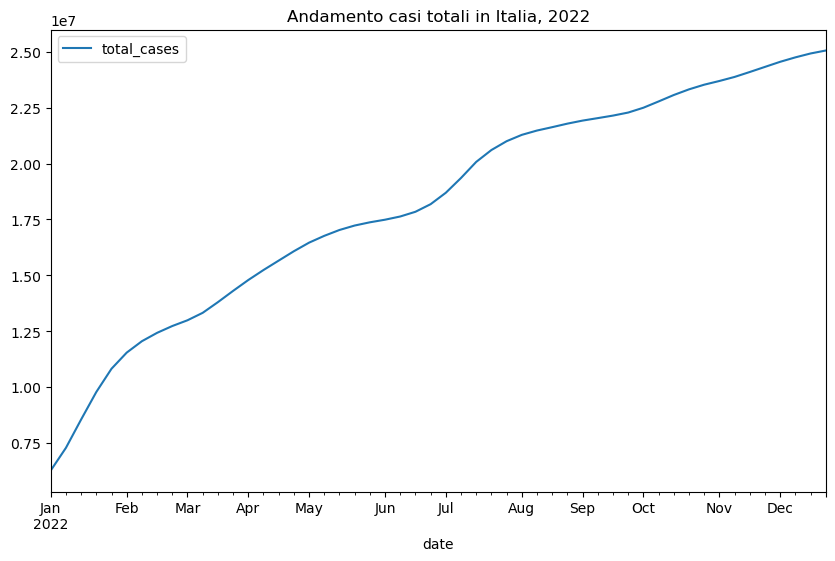

In [143]:
italia_2022.plot(kind='line', x='date', y='total_cases', figsize =(10,6), title='Andamento casi totali in Italia, 2022')
# Grafico che visualizza l'andamento dei casi totali per il periodo Gennaio-Dicembre 2022

<Axes: title={'center': 'Nuovi casi registrati in Italia, 2022'}, xlabel='date'>

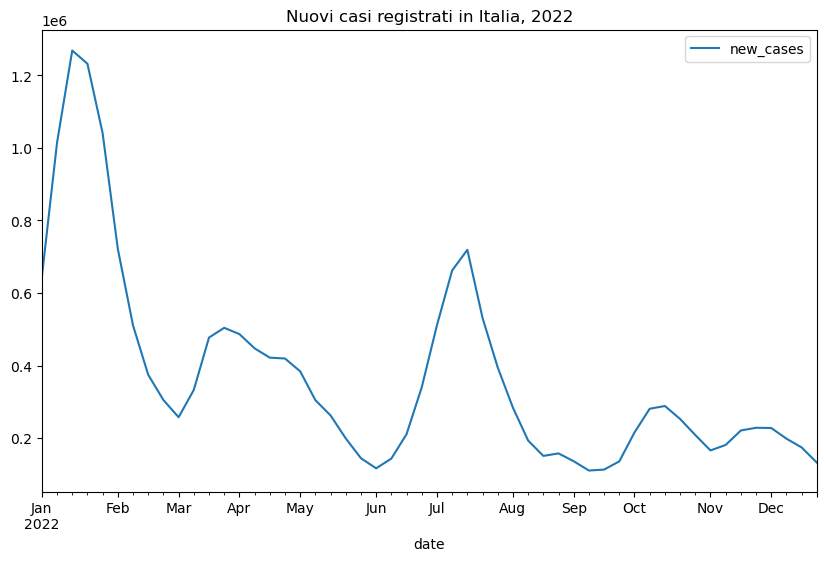

In [139]:
italia_2022.plot(kind='line', x='date', y='new_cases', figsize =(10,6), title='Nuovi casi registrati in Italia, 2022')
# Grafico che visualizza l'andamento dei nuovi casi registrati nel periodo Gennaio-Dicembre 2022

Riguardo le nazioni di **Italia**, **Germania** e **Francia**:

- mostrare in un **boxplot** la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (*Intensive Care Unit*, **ICU**, considerare quindi la colonna *icu_patients*) da maggio 2022 (incluso) ad aprile 2023 (incluso);

- scrivere un *breve commento* (una o due righe) riguardo che conclusioni possiamo trarre osservando il grafico risultante.

In [153]:
filtro_paesi = covid_db[covid_db['location'].isin(['Italy', 'France', 'Germany'])]
filtro_paesi.shape
# Creo il filtro specifico per i 3 paesi di interesse, visualizzandone le dimensioni

(5025, 68)

In [177]:
filtro_icu = filtro_paesi[(filtro_paesi['date'] >= '2022-05-01') & (filtro_paesi['date'] <= '2023-04-30')]
filtro_icu.shape
# Creo il filtro data richiesto, visualizzandone le dimensioni

(1095, 68)

In [187]:
filtro_icu[['location', 'icu_patients', 'date']].sample(10)
# Visualizzo un campione dei dati ottenuti

,location,icu_patients,date
141307,Germany,718.0,2022-06-19
131471,France,1227.0,2023-01-13
186277,Italy,140.0,2022-10-03
131276,France,951.0,2022-07-02
186172,Italy,209.0,2022-06-20
186392,Italy,205.0,2023-01-26
186467,Italy,85.0,2023-04-11
186229,Italy,299.0,2022-08-16
186220,Italy,342.0,2022-08-07
186225,Italy,306.0,2022-08-12


<Axes: xlabel='icu_patients', ylabel='location'>

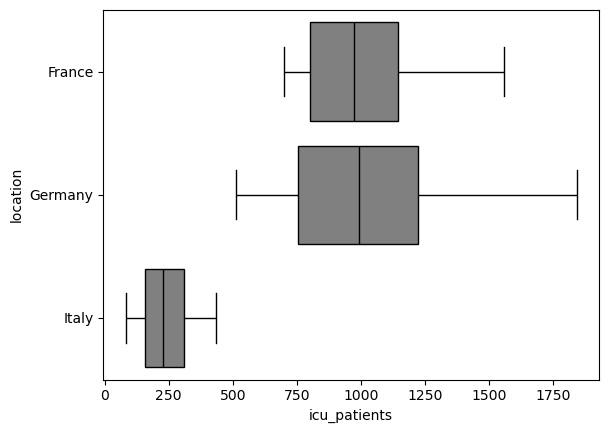

In [232]:
sns.boxplot(data=filtro_icu, x="icu_patients", y="location", color='grey', orient='h', linecolor='black')
# Grafico di Francia, Germania e Italia per ricoveri in TI

Il grafico evidenzia come la distribuzione di ricoveri in **TI** in Italia sia molto più bassa (e anche più omogenea) rispetto a quella di Francia e Germania, con un **range interquartile** (IQR) molto concentrato rispetto a quello dei 2 paesi d'oltralpe. Da segnalare inoltre per Germania e Francia distribuzioni molto asimmetriche, che invece non osserviamo con nettezza nel caso dell'Italia.

Riguardo le nazioni di **Italia**, **Germania**, **Francia** e **Spagna** in tutto il **2021**:

- mostrare, in maniera grafica oppure numerica, la somma dei pazienti ospedalizzati per ognuna (colonna *hosp_patients*);

- se ci sono *dati nulli*, con un breve commento scrivere se può essere possibile gestirli tramite sostituzioni o meno.

In [262]:
filtro_paesi = covid_db[covid_db['location'].isin(['Italy', 'France', 'Germany', 'Spain'])]
filtro_paesi
# Creo il filtro per Italia, Germania, Francia e Spagna.

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year
130367,FRA,Europe,France,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,5.98,82.66,0.901,67813000,-1002.2,-7.29,-7.29,-15.542791,2020
130368,FRA,Europe,France,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN,2020
130369,FRA,Europe,France,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN,2020
130370,FRA,Europe,France,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN,2020
130371,FRA,Europe,France,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364255,ESP,Europe,Spain,2024-07-31,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,NaN,2.97,83.56,0.904,47558632,NaN,NaN,NaN,NaN,2024
364256,ESP,Europe,Spain,2024-08-01,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,NaN,2.97,83.56,0.904,47558632,NaN,NaN,NaN,NaN,2024
364257,ESP,Europe,Spain,2024-08-02,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,NaN,2.97,83.56,0.904,47558632,NaN,NaN,NaN,NaN,2024
364258,ESP,Europe,Spain,2024-08-03,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,NaN,2.97,83.56,0.904,47558632,NaN,NaN,NaN,NaN,2024


In [275]:
filtro_paesi_21 = filtro_paesi[filtro_paesi['year'] == 2021]
filtro_paesi_21
# Creo il filtro per il 2021

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year
130729,FRA,Europe,France,2021-01-01,2338258.0,0.0,11984.000,63534.0,0.0,445.571,...,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN,2021
130730,FRA,Europe,France,2021-01-02,2338258.0,0.0,11984.000,63534.0,0.0,445.571,...,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN,2021
130731,FRA,Europe,France,2021-01-03,2427206.0,88948.0,12706.857,66449.0,2915.0,416.429,...,NaN,5.98,82.66,0.901,67813000,47362.797,7.68,11.25,733.9491,2021
130732,FRA,Europe,France,2021-01-04,2427206.0,0.0,12706.857,66449.0,0.0,416.429,...,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN,2021
130733,FRA,Europe,France,2021-01-05,2427206.0,0.0,12706.857,66449.0,0.0,416.429,...,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363308,ESP,Europe,Spain,2021-12-27,6100138.0,0.0,70149.429,91275.0,0.0,83.429,...,NaN,2.97,83.56,0.904,47558632,NaN,NaN,NaN,NaN,2021
363309,ESP,Europe,Spain,2021-12-28,6100138.0,0.0,70149.429,91275.0,0.0,83.429,...,NaN,2.97,83.56,0.904,47558632,NaN,NaN,NaN,NaN,2021
363310,ESP,Europe,Spain,2021-12-29,6100138.0,0.0,70149.429,91275.0,0.0,83.429,...,NaN,2.97,83.56,0.904,47558632,NaN,NaN,NaN,NaN,2021
363311,ESP,Europe,Spain,2021-12-30,6100138.0,0.0,70149.429,91275.0,0.0,83.429,...,NaN,2.97,83.56,0.904,47558632,NaN,NaN,NaN,NaN,2021


In [277]:
filtro_paesi_21.shape

(1460, 68)

In [291]:
filtro_paesi_21.groupby('location')['hosp_patients'].sum()
# Con il GroupBy vado a visualizzare il numero di ospedalizzazioni per paese.

location
France     6008717.0
Germany          0.0
Italy      4419950.0
Spain      2411706.0
Name: hosp_patients, dtype: float64

<Axes: xlabel='location', ylabel='hosp_patients'>

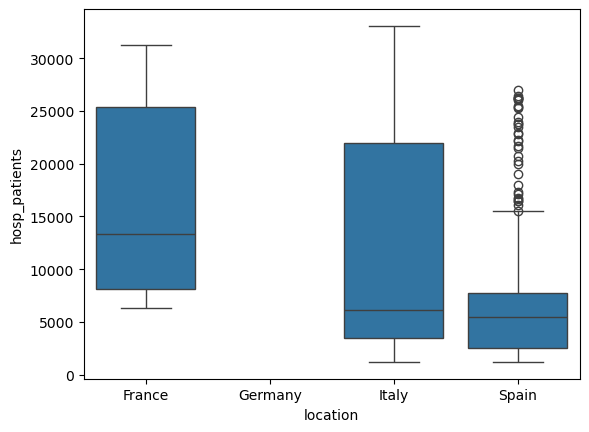

In [332]:
sns.boxplot(data=filtro_paesi_21, x='location', y='hosp_patients')
# Visualizzazione grafica dell'analisi di cui sopra.

In [362]:
tot_osped = filtro_paesi_21.groupby('location')['hosp_patients'].sum().reset_index()
# Visualizzo le ospedalizzazioni totali per ciascun paese.
# Resetto gli indici di modo che possa ottenere un DF.

<Axes: xlabel='location', ylabel='hosp_patients'>

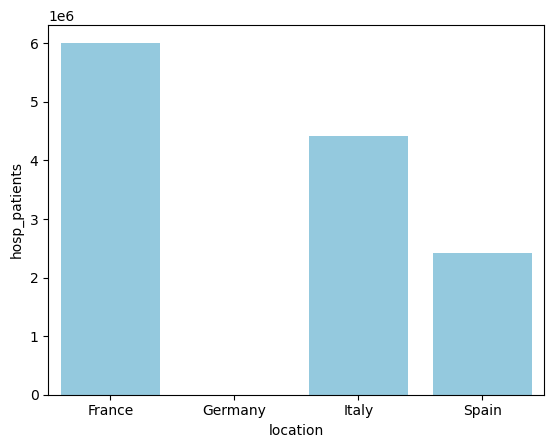

In [369]:
sns.barplot(data=tot_osped, y='hosp_patients', x='location', color='skyblue')

Trattandosi di **dati non esistenti** nel DB, **non** possiamo operare una sostituzione nè con *fillna()* (e derivati) nè con *interpolate()*.